<a href="https://colab.research.google.com/github/Tamanna-Nahar/forest_fire_prediction/blob/main/forest_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and dataset loading

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
data = pd.read_csv(url)


Data Preprocessing

In [ ]:
data = pd.get_dummies(data, columns=['month', 'day'])

def risk_category(area):
    if area <= 1:
        return 'Low'
    elif area <= 5:
        return 'Medium'
    else:
        return 'High'

data['risk'] = data['area'].apply(risk_category)


Split features and target

In [ ]:
X = data.drop(['area', 'risk'], axis=1)
y = data['risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Train model

In [ ]:

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Evaluate model

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5384615384615384
              precision    recall  f1-score   support

        High       0.45      0.30      0.36        30
         Low       0.57      0.78      0.66        55
      Medium       0.44      0.21      0.29        19

    accuracy                           0.54       104
   macro avg       0.49      0.43      0.44       104
weighted avg       0.51      0.54      0.51       104



Data visualization

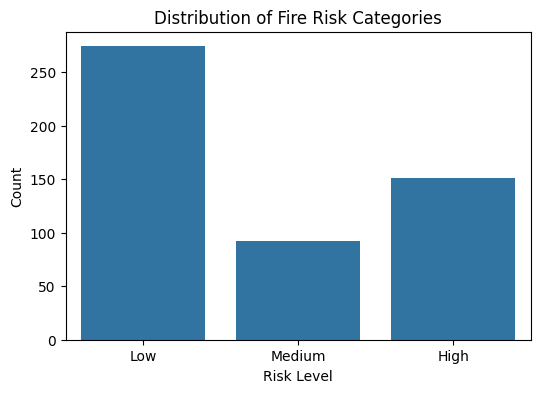

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribution of Fire Risk Categories")
plt.xlabel("Risk Level")
plt.ylabel("Count")
plt.show()

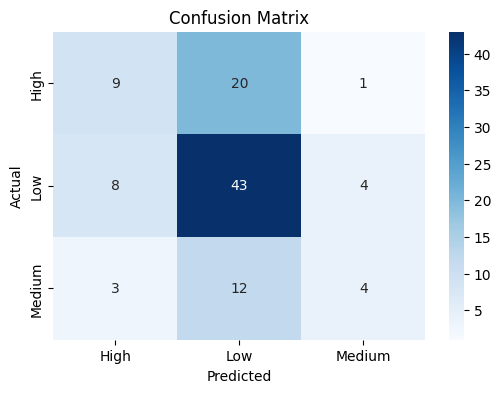

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

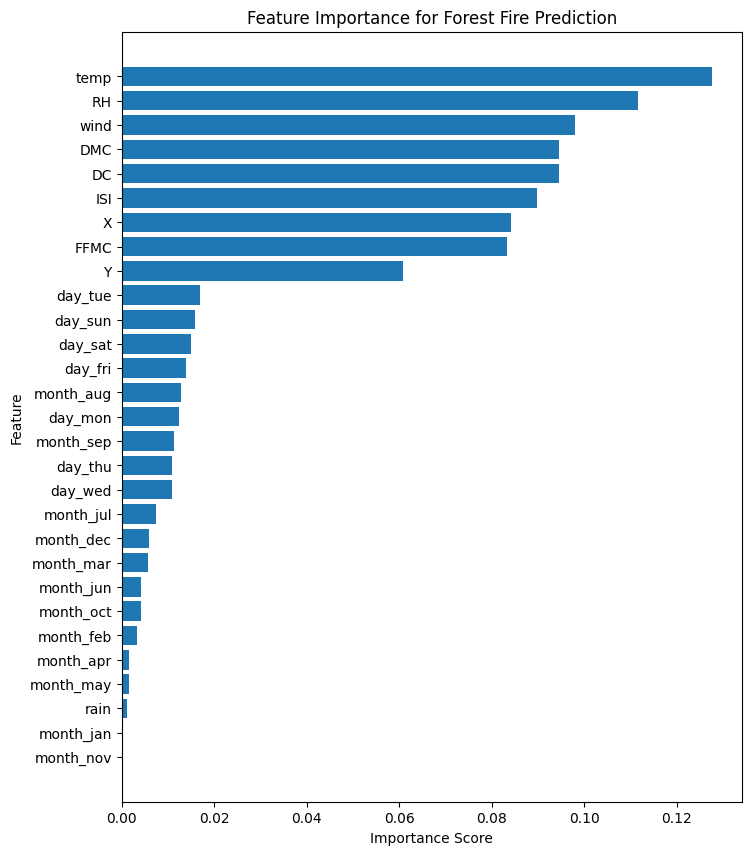

In [ ]:
importances = model.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(8,10))
plt.barh(X.columns[indices], importances[indices])
plt.title("Feature Importance for Forest Fire Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Example Prediction

In [ ]:

sample = pd.DataFrame([{
    'X': 7, 'Y': 5, 'FFMC': 86.2, 'DMC': 26.2, 'DC': 94.3,
    'ISI': 5.1, 'temp': 19.3, 'RH': 50, 'wind': 4.0, 'rain': 0.0,
    **{col: 0 for col in X.columns if col.startswith('month_') or col.startswith('day_')}
}], columns=X.columns)

print("Predicted risk:", model.predict(sample)[0])

Predicted risk: Low
